# K-Means Clustering

Akmalda Seto Triwibowo (19/440233/TK/48560)

This program is adopting the code by Patrick Loeber (Python Engineer) from his video on youtube "K-Means Clustering in Python - Machine Learning From Scratch 12 - Python Tutorial"
with some modification:
- adding more comments to help understand each code
- create and save plot to .png for every iterations to help analyzing the method
- get the dataset from .csv file with panda library

### Import library

In [ ]:
import numpy as np # Library for the scientific computing
import pandas as pd # Library to help import the .csv data later

np.random.seed(42) # To have the same "first random initialization centroid"

### Euclidean function
##### Global function for calculating distance between two vector

In [ ]:
# Eclidean function to calculate distance between two vector
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

### Main function
Include all the calculation needed based on the block diagram to do the K-Means Clustering. Using object oriented programming to have the "KMeans" class.

(38276, 2)
[[ 40.68494    -73.95765   ]
 [ 40.68535    -73.95512   ]
 [ 40.66265    -73.99454   ]
 ...
 [ 40.75388671 -73.98053561]
 [ 40.75556931 -73.98197637]
 [ 40.67756031 -73.89498988]]


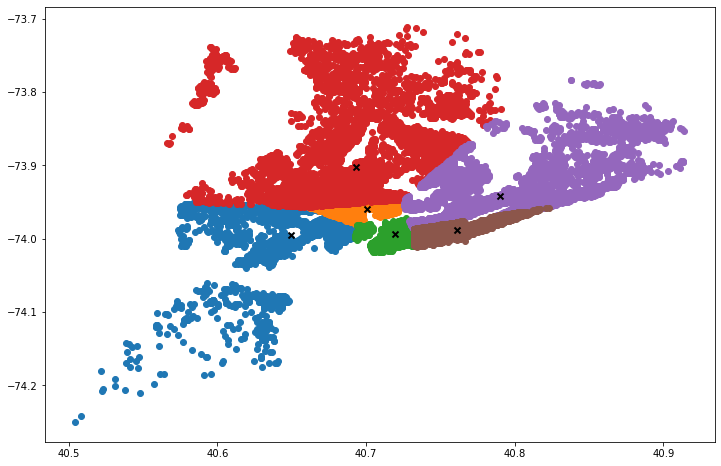

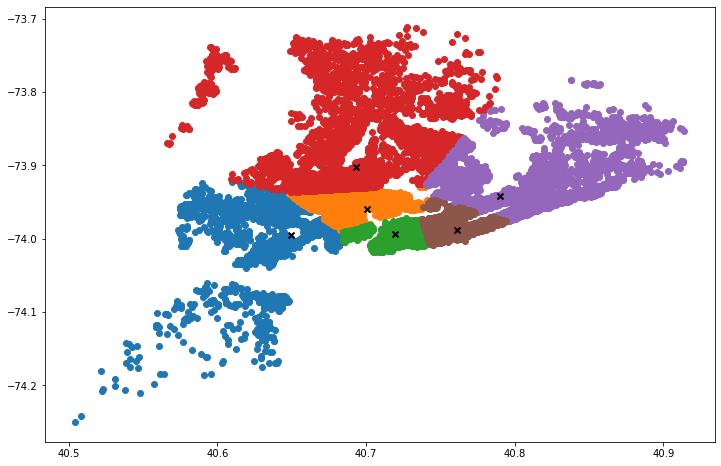

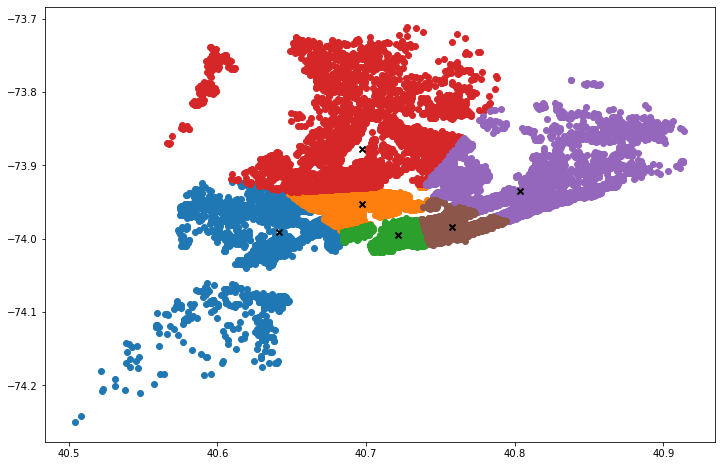

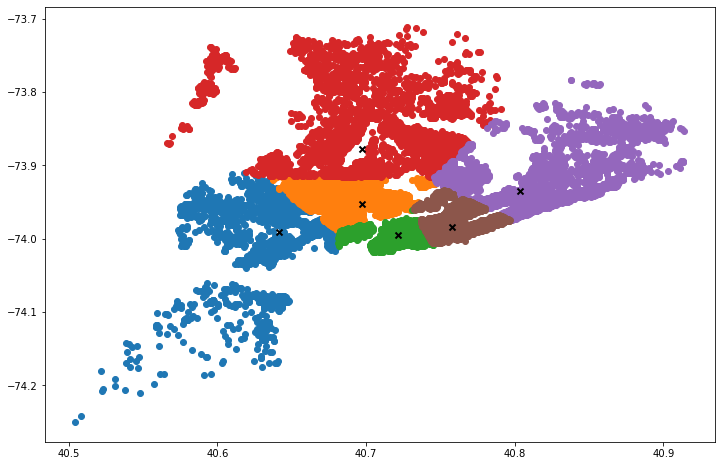

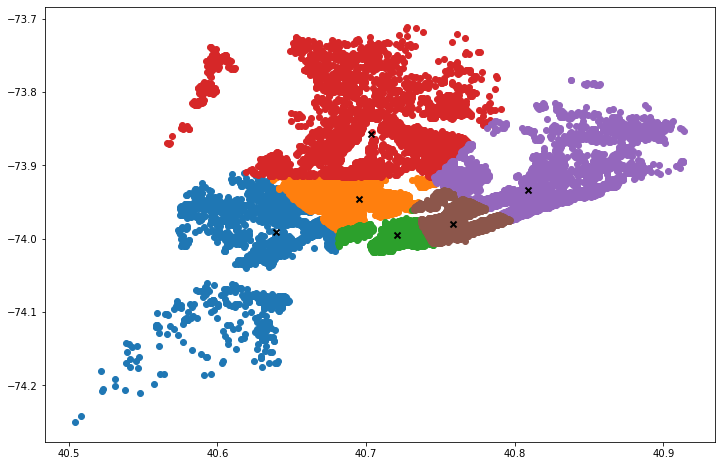

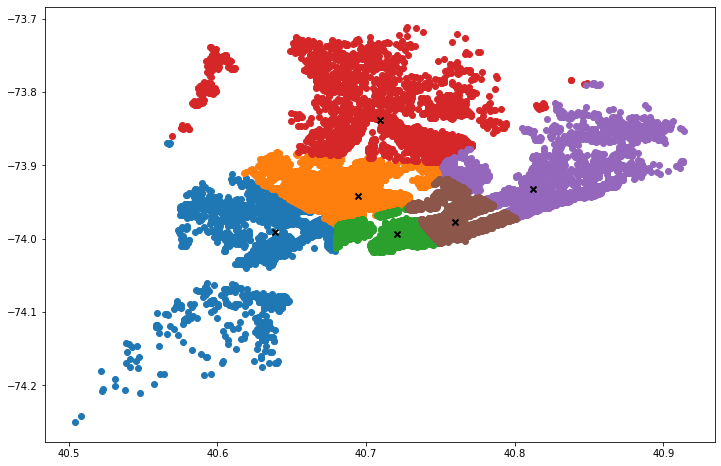

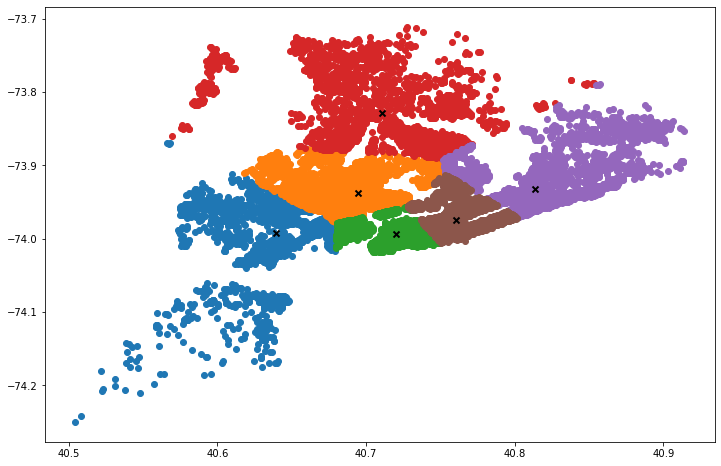

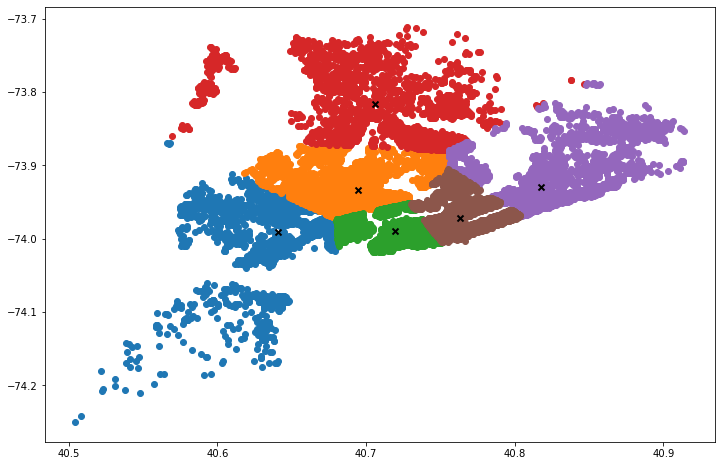

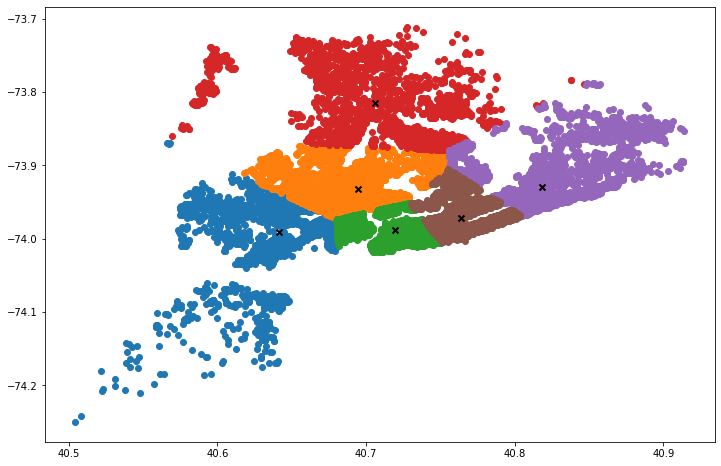

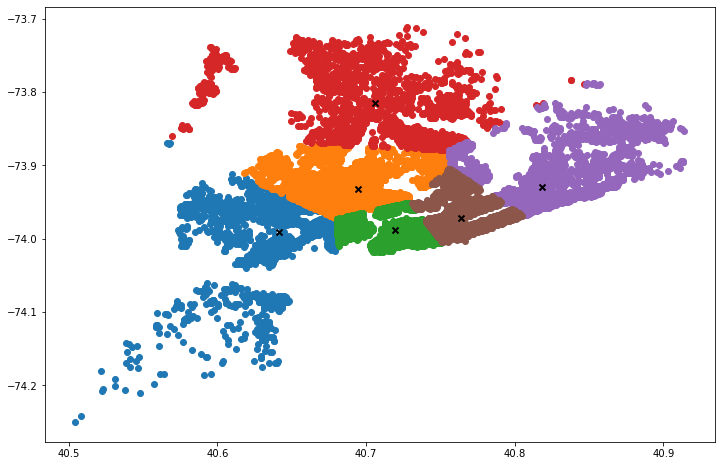

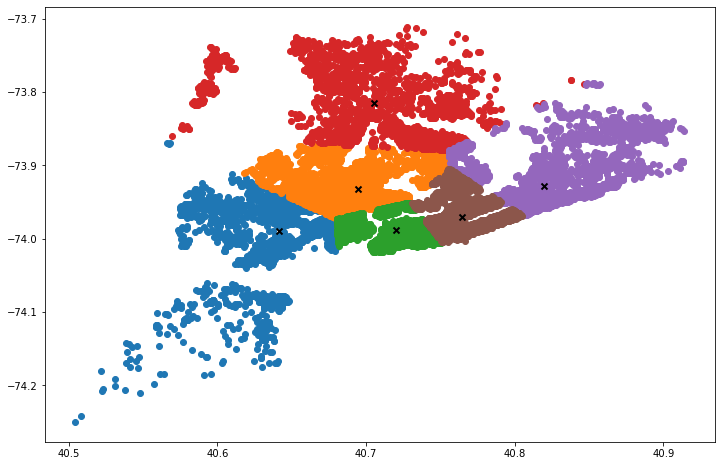

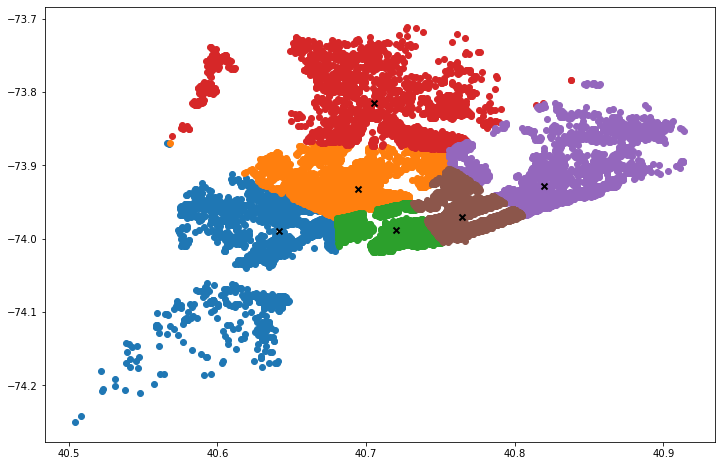

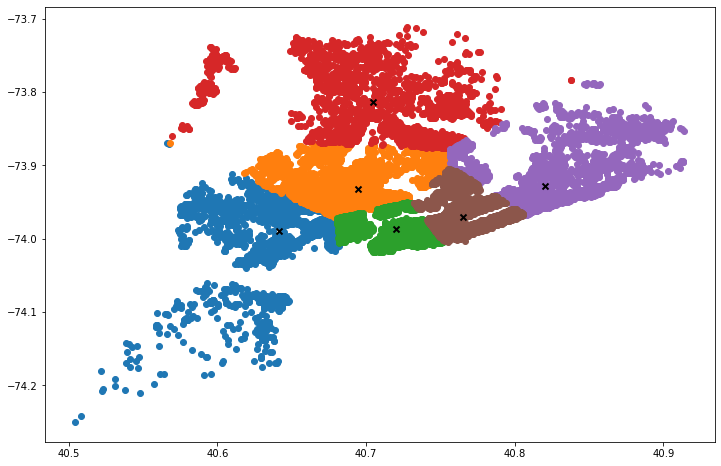

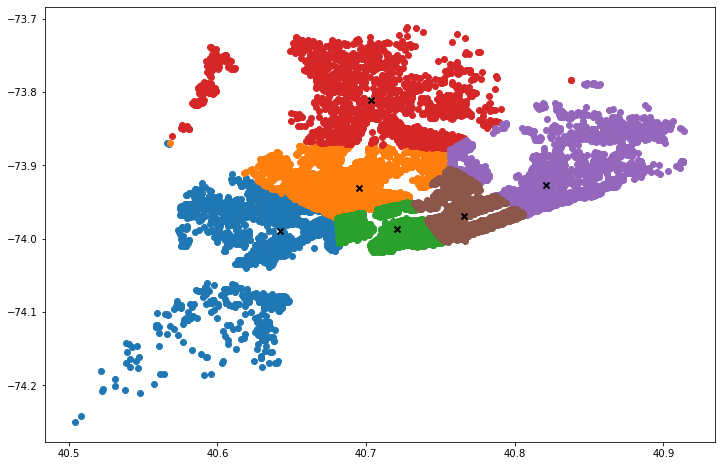

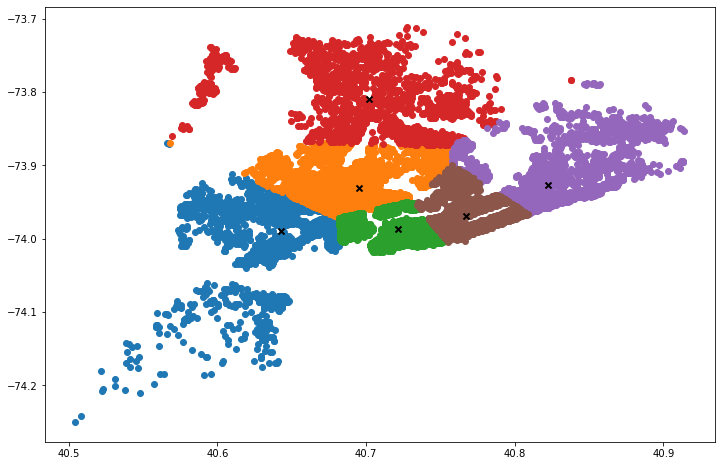

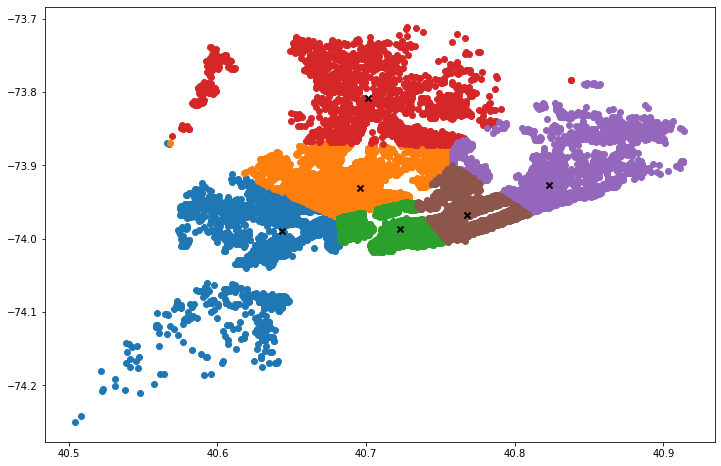

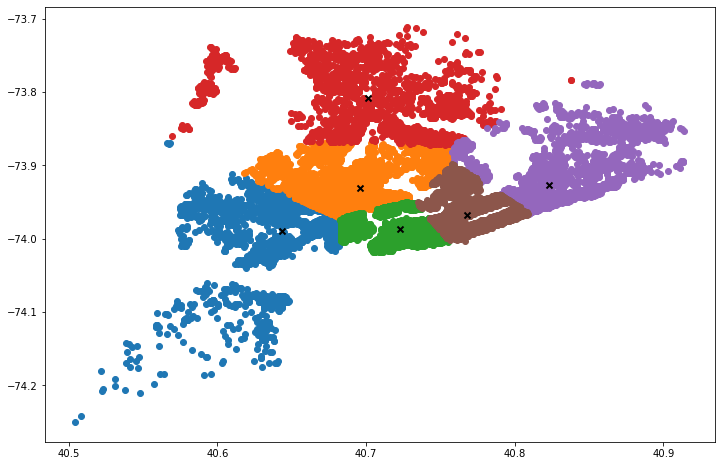

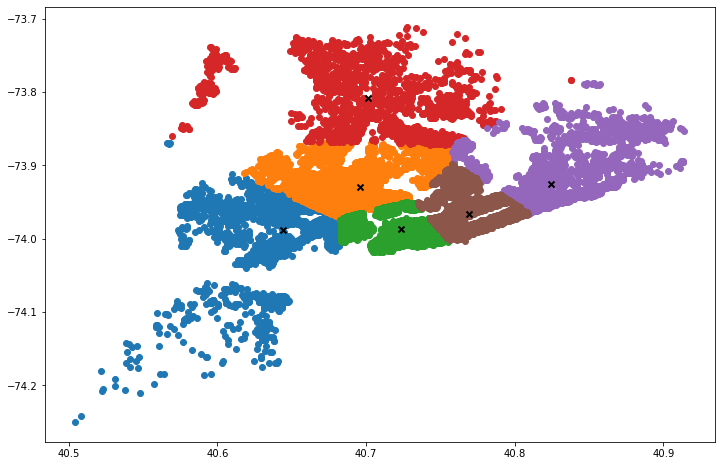

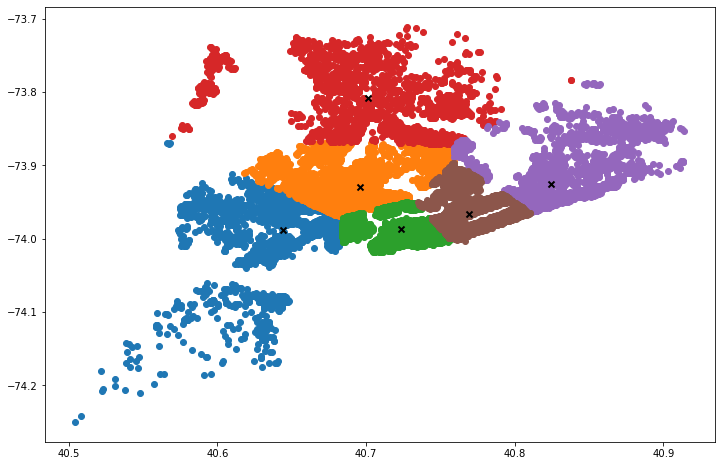

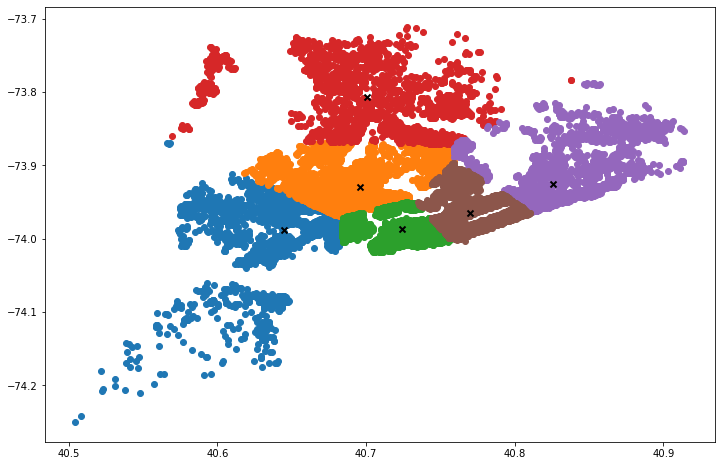

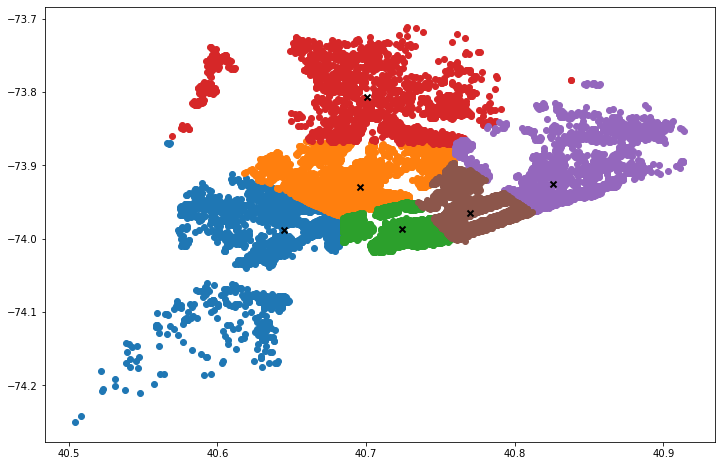

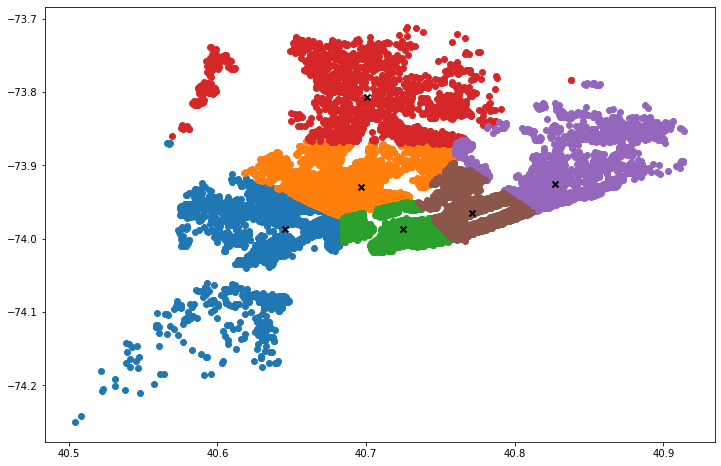

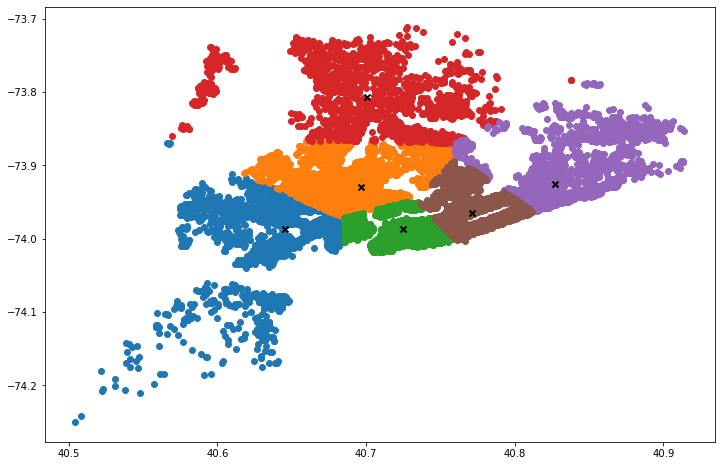

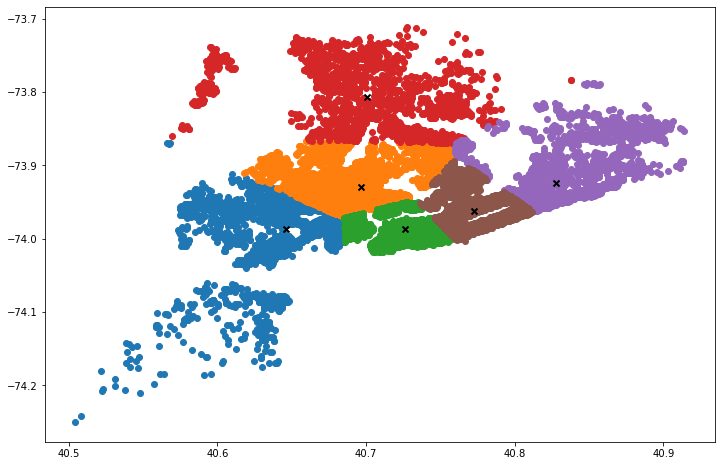

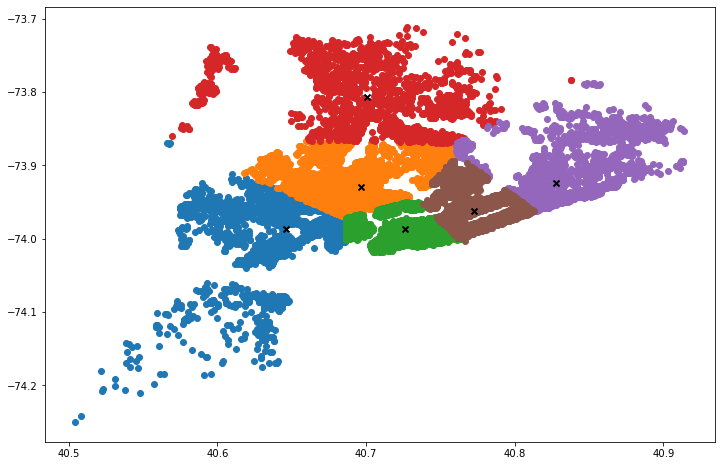

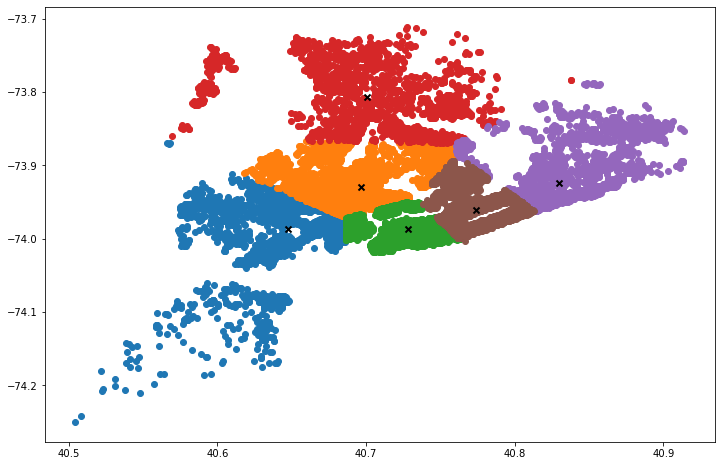

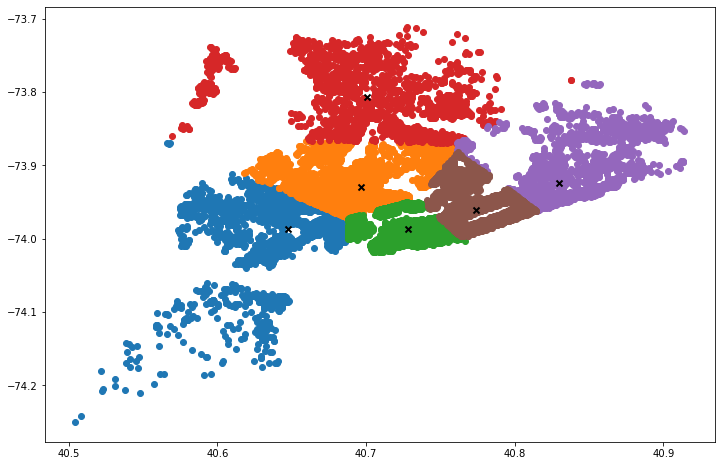

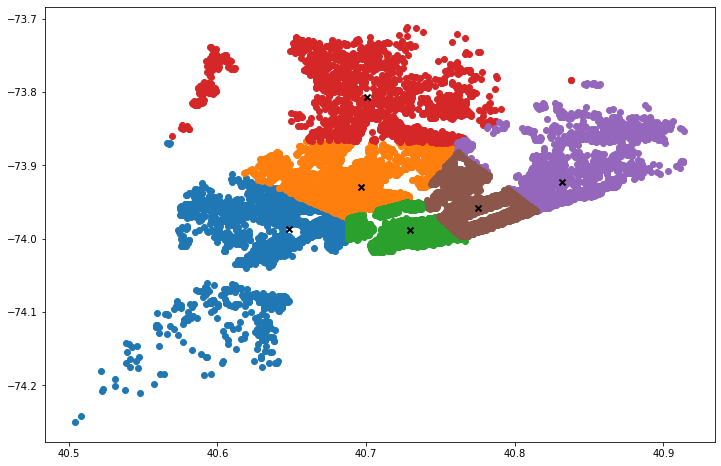

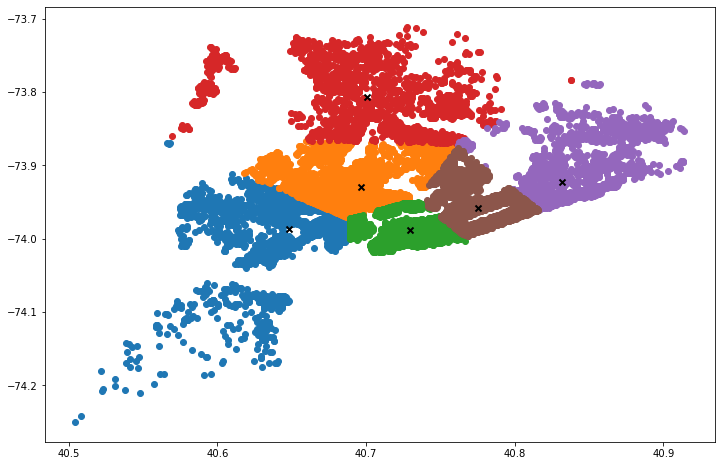

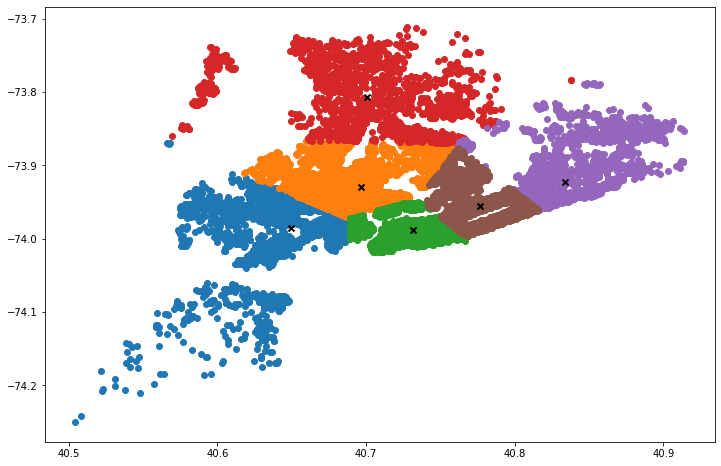

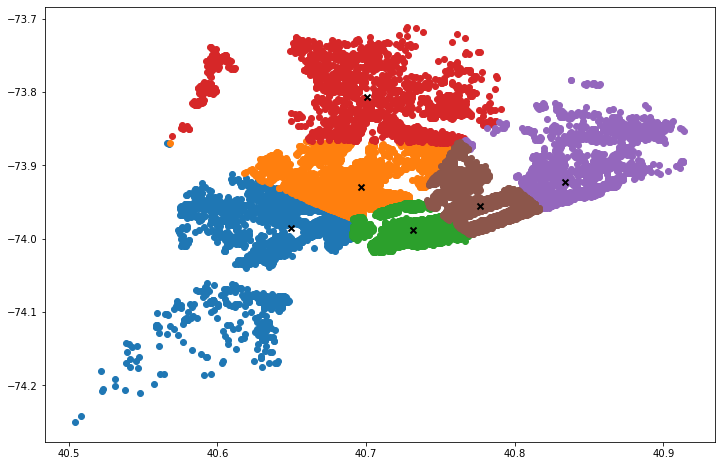

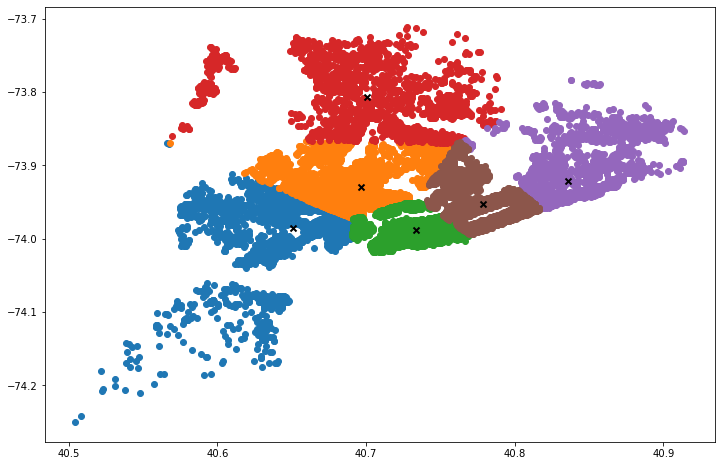

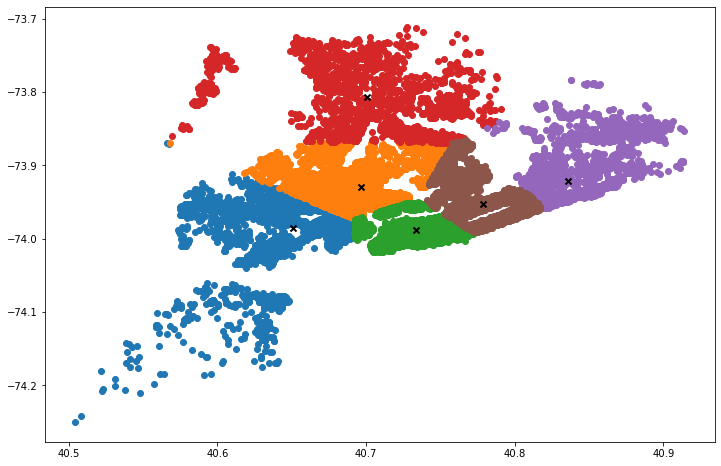

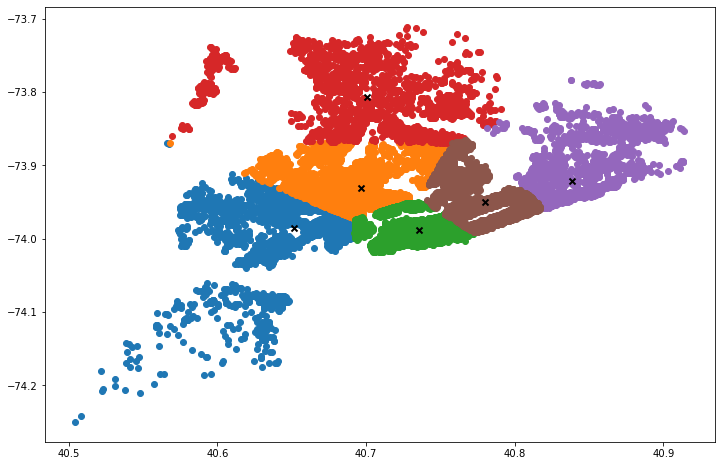

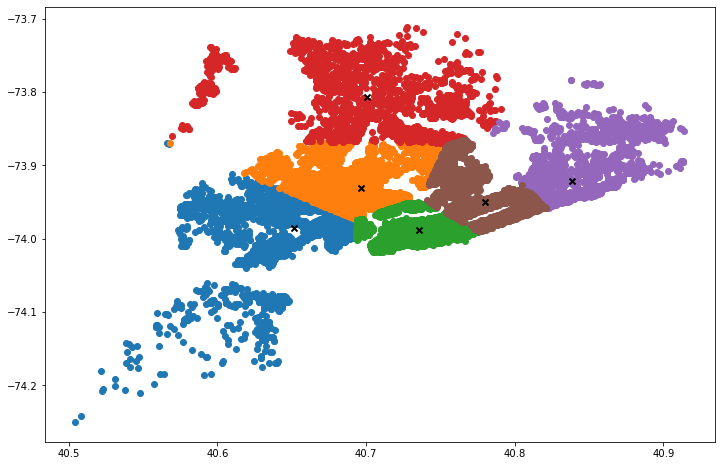

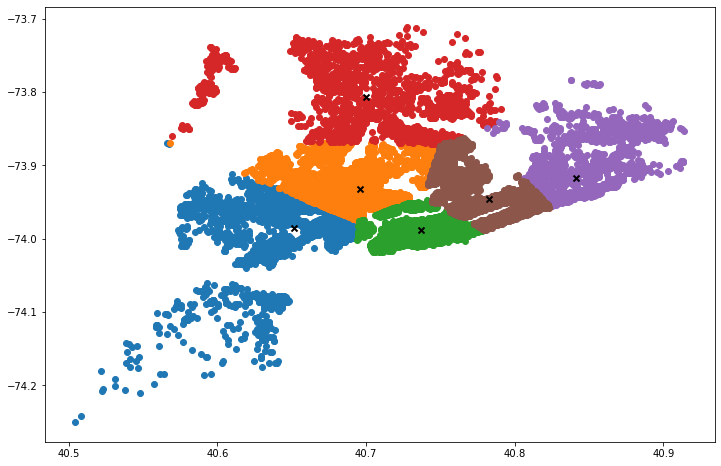

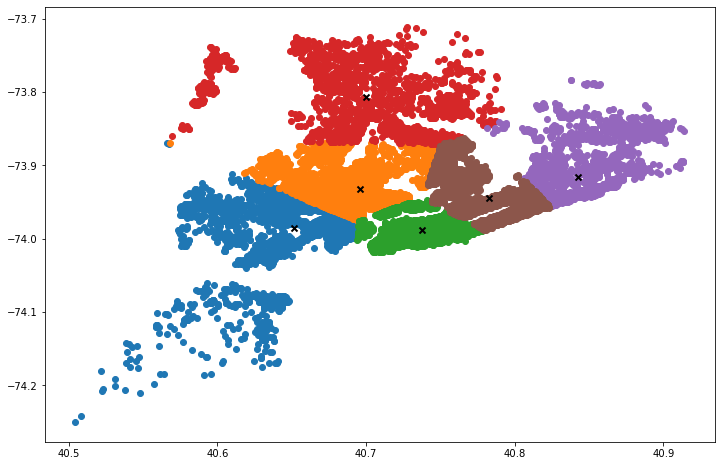

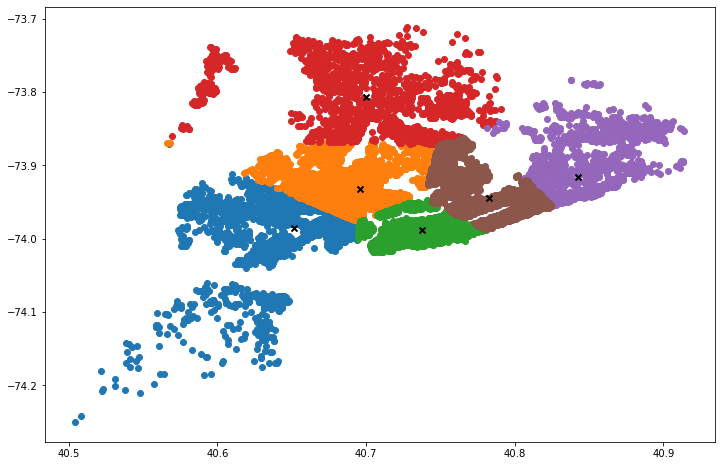

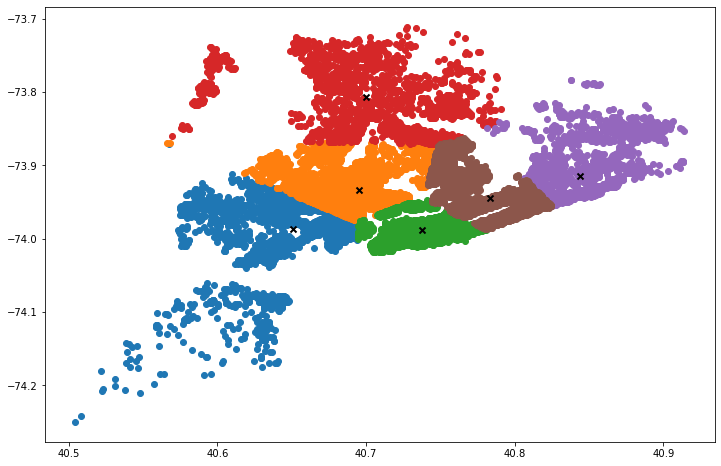

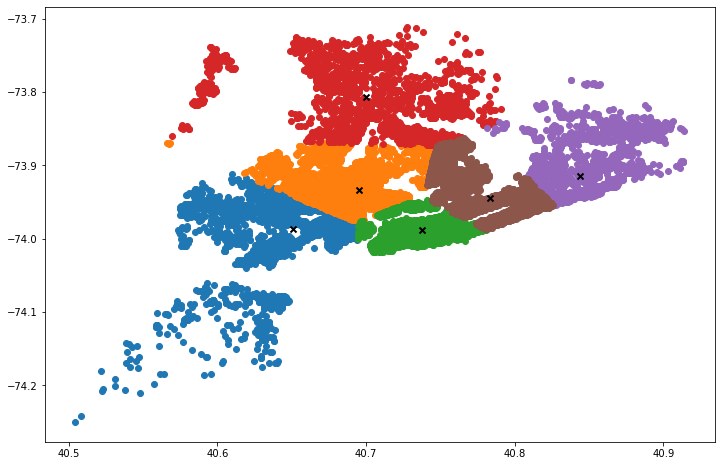

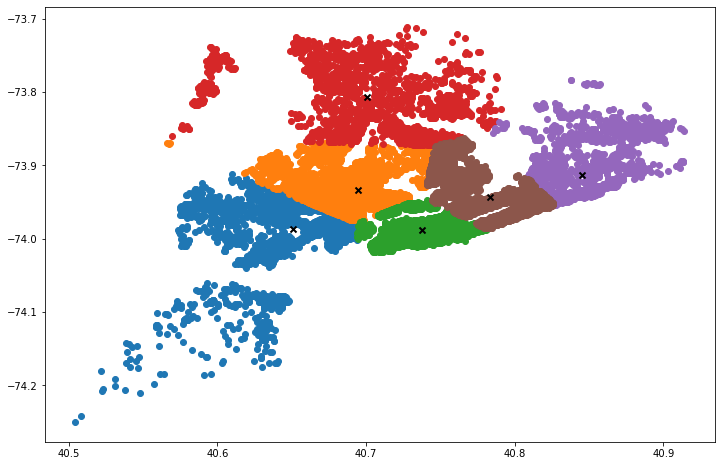

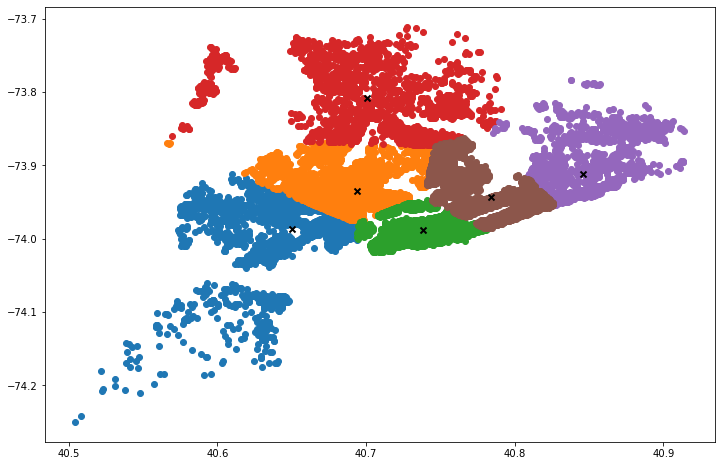

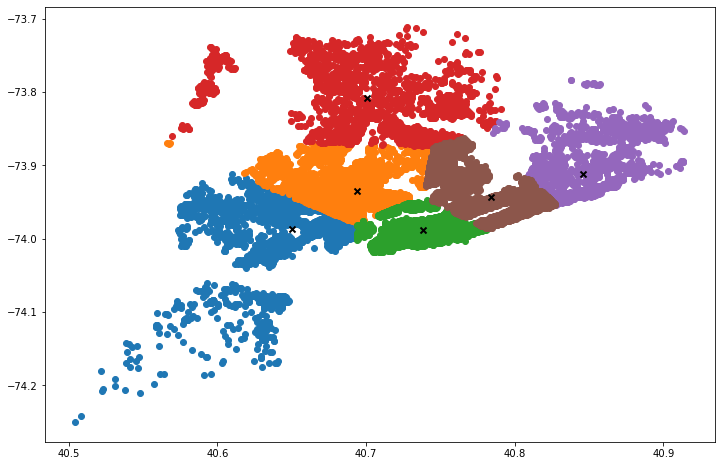

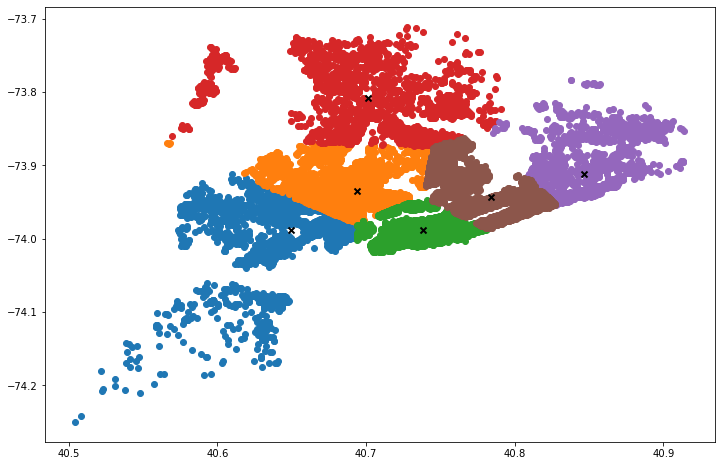

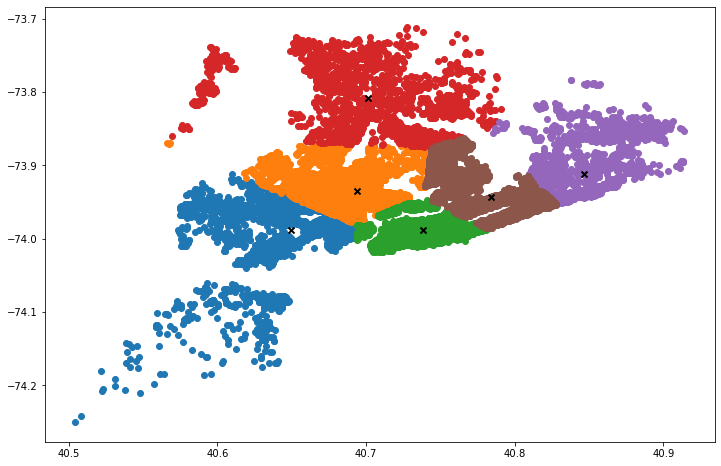

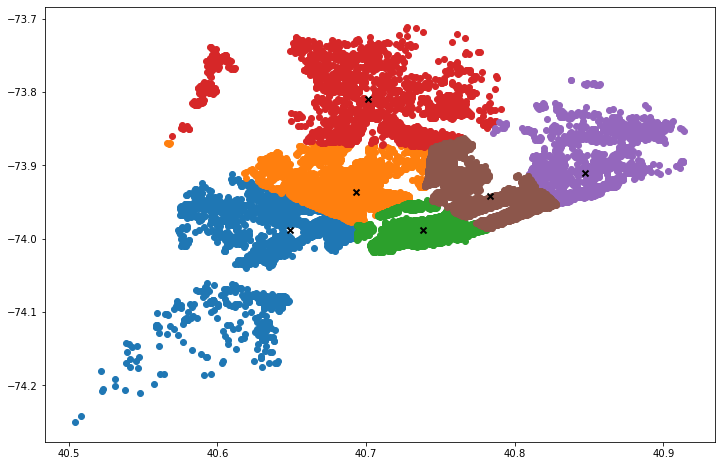

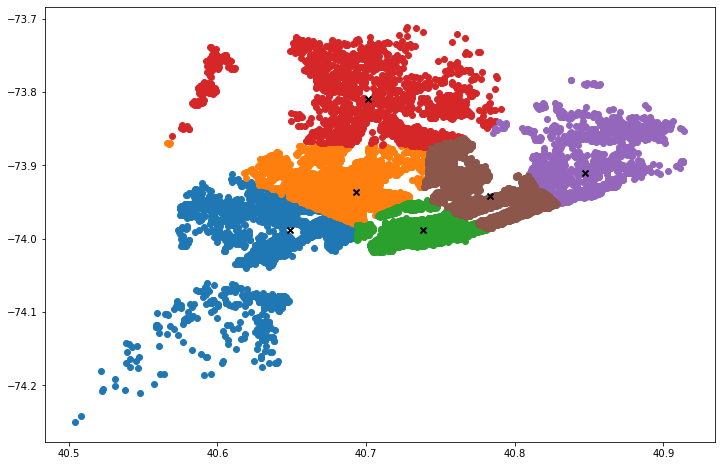

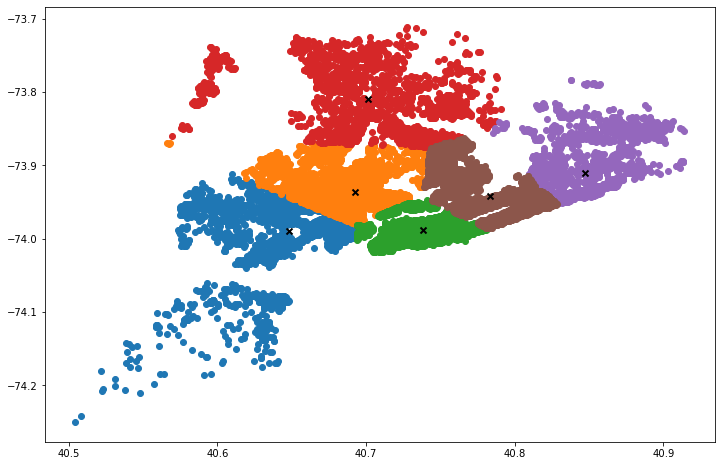

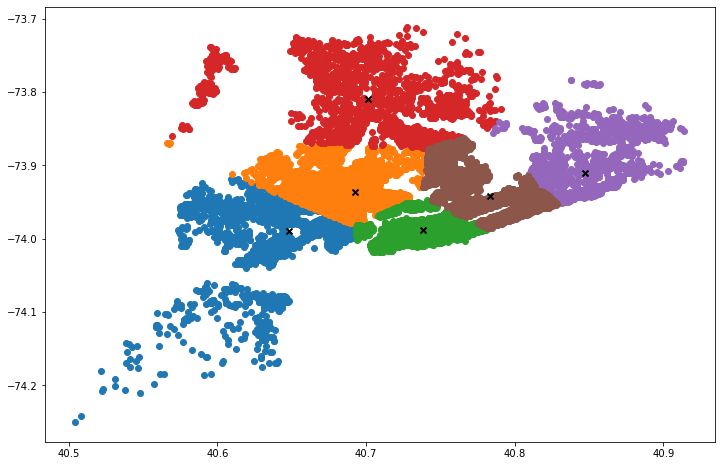

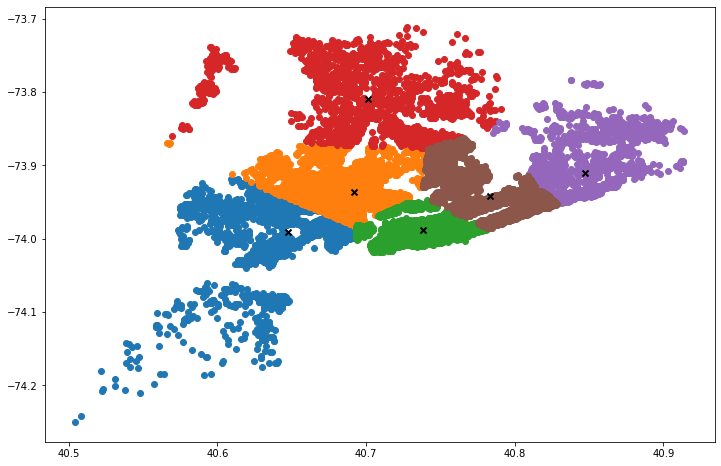

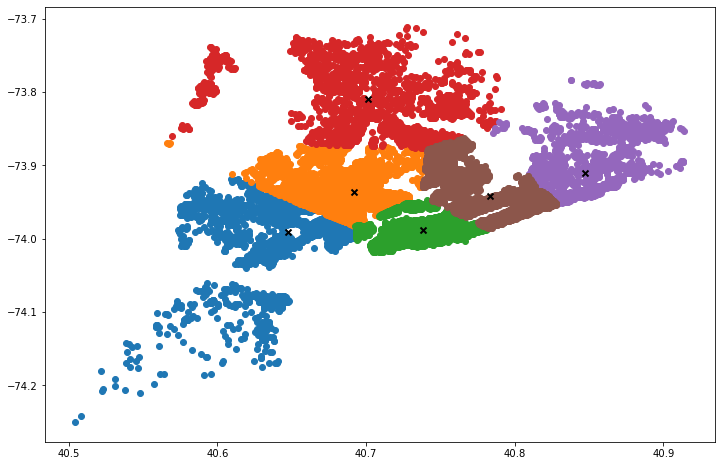

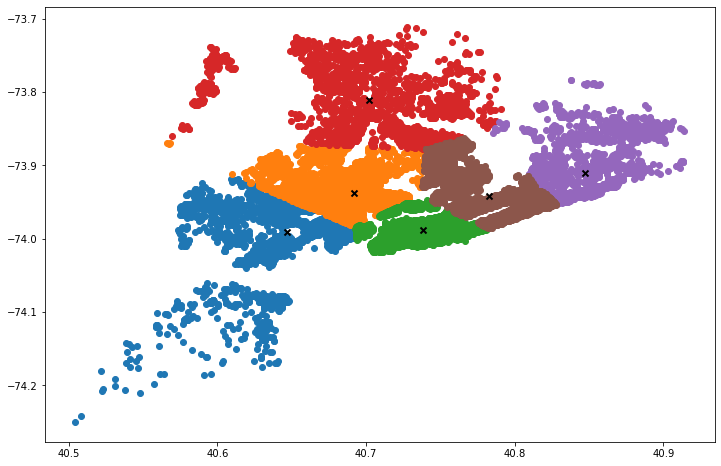

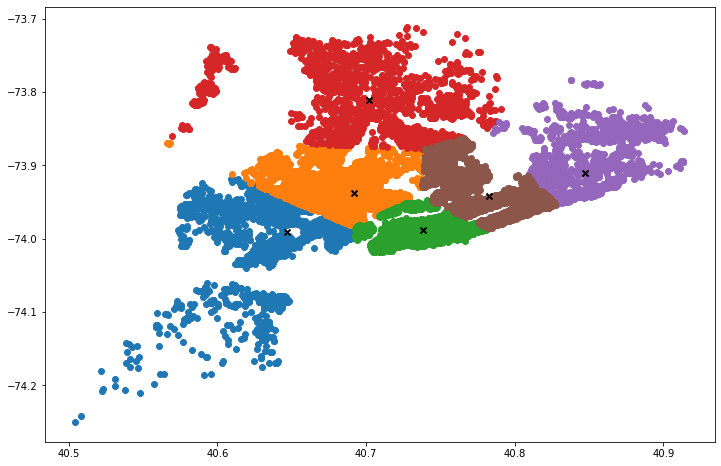

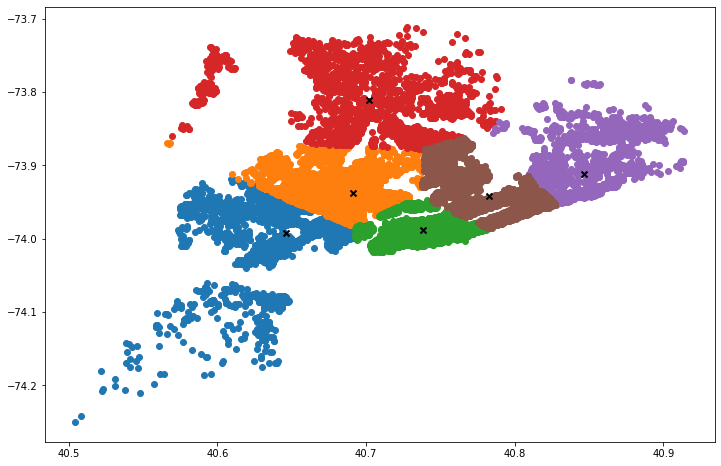

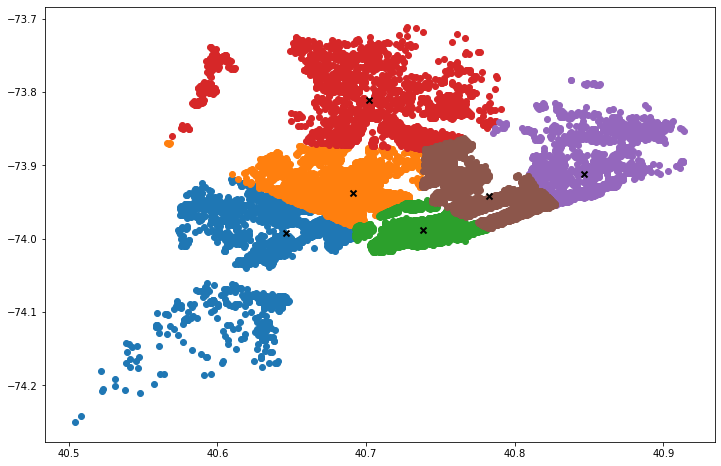

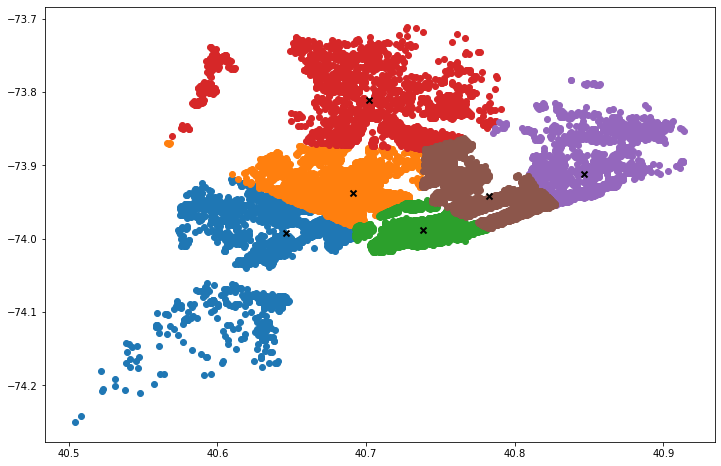

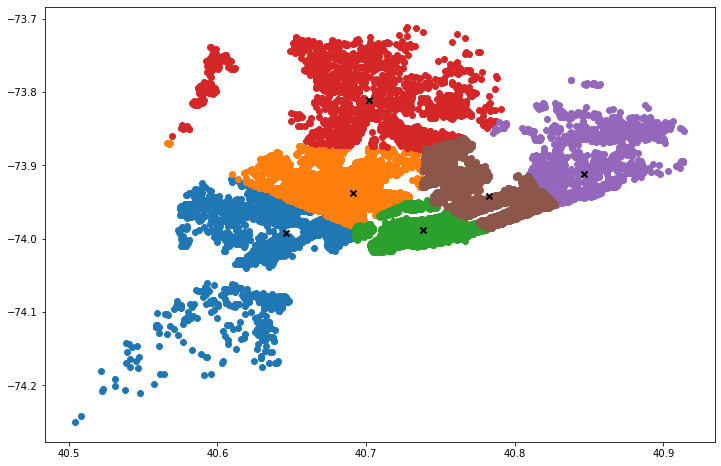

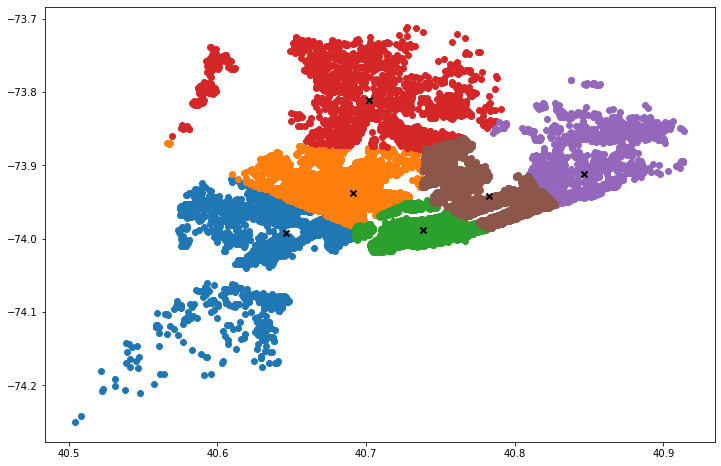

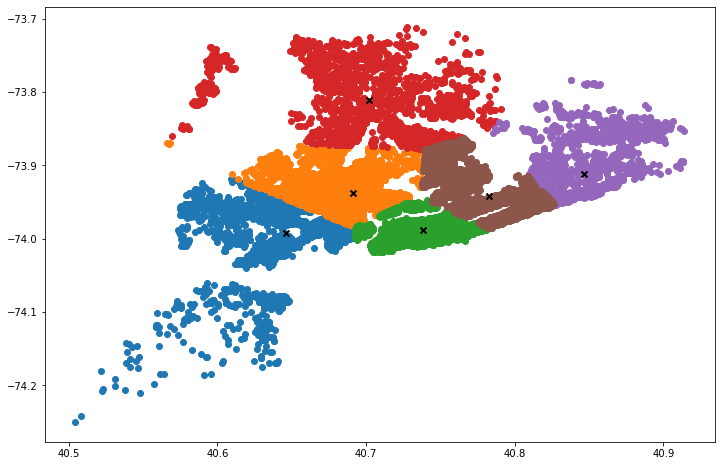

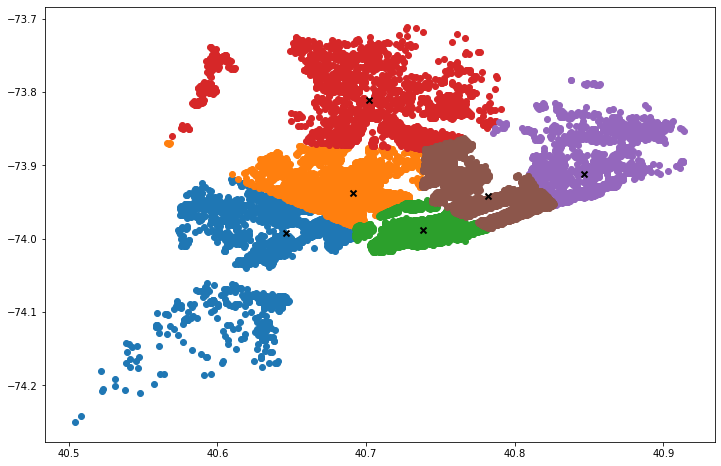

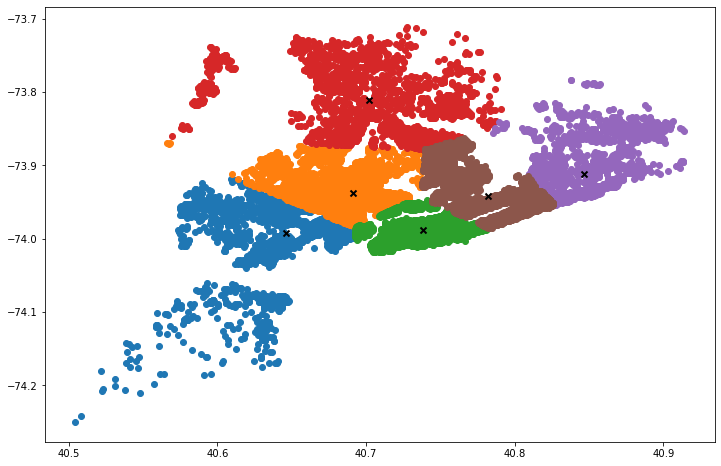

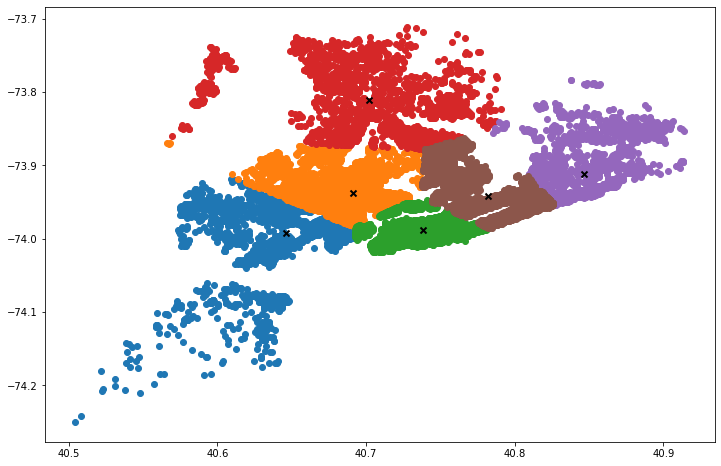

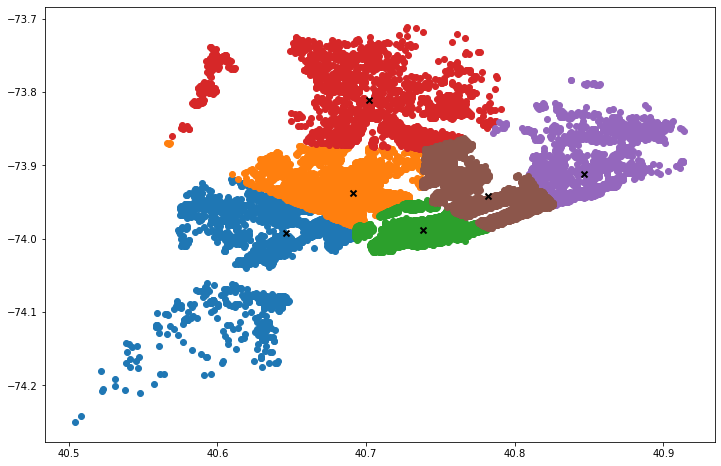

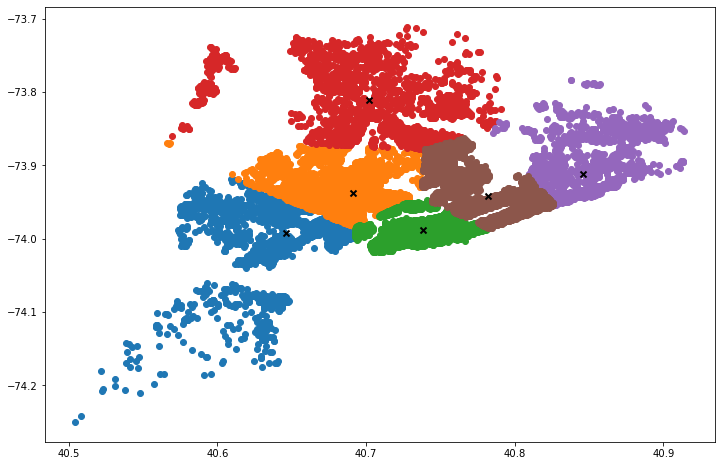

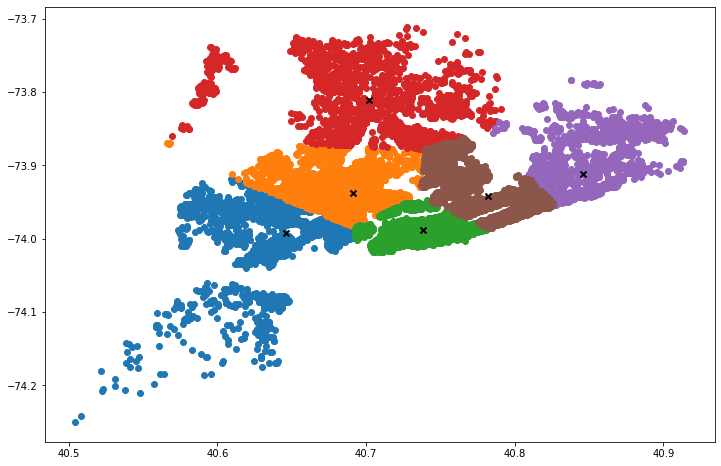

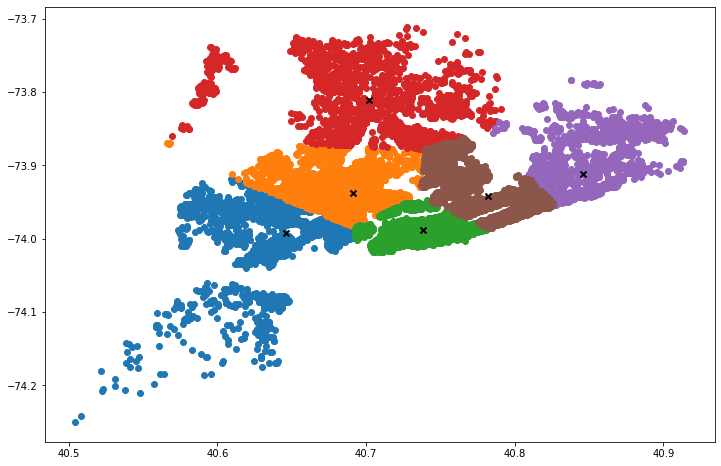

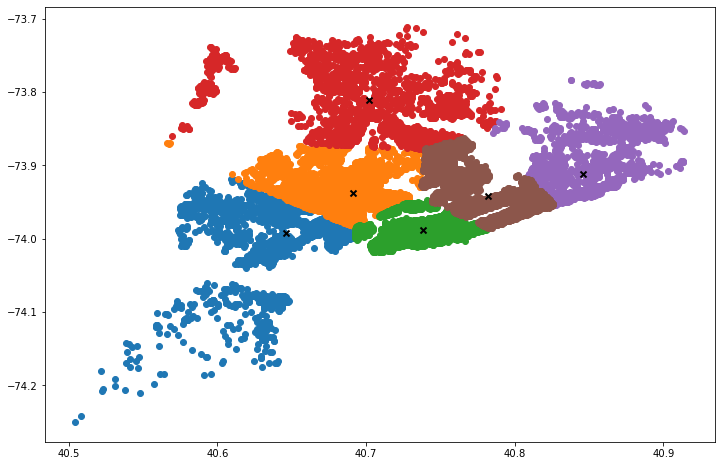

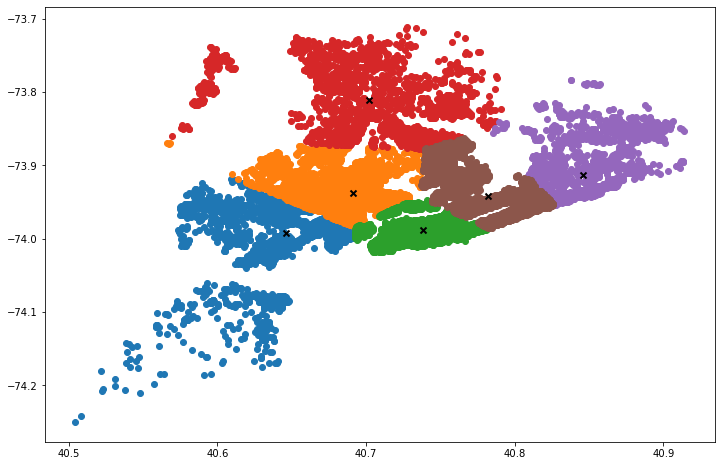

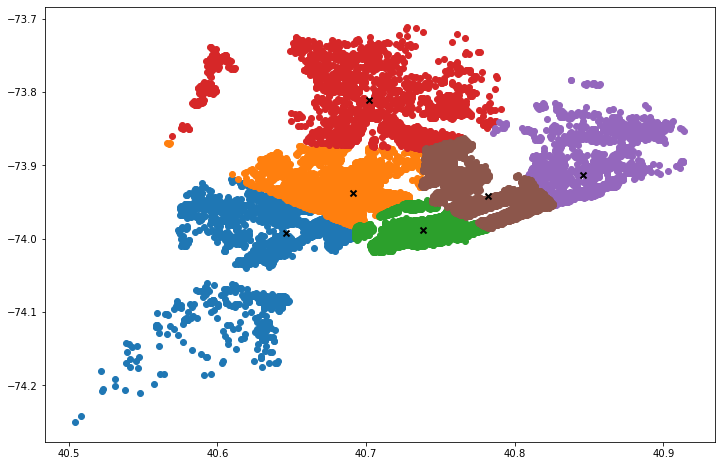

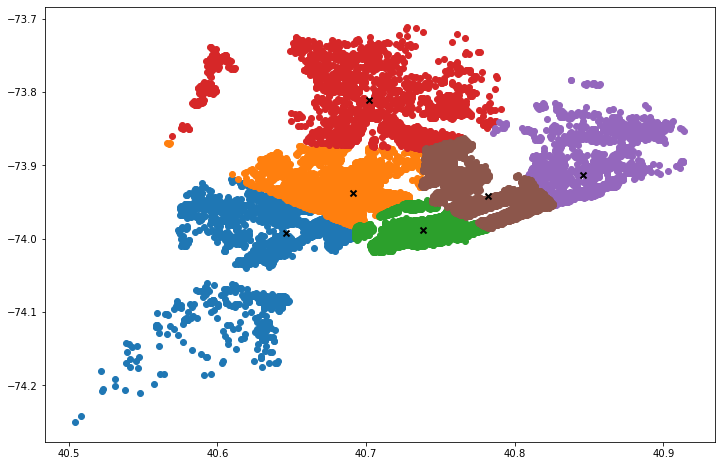

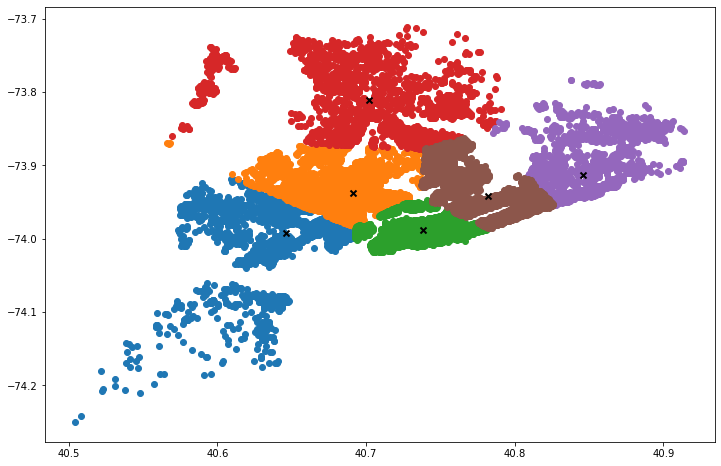

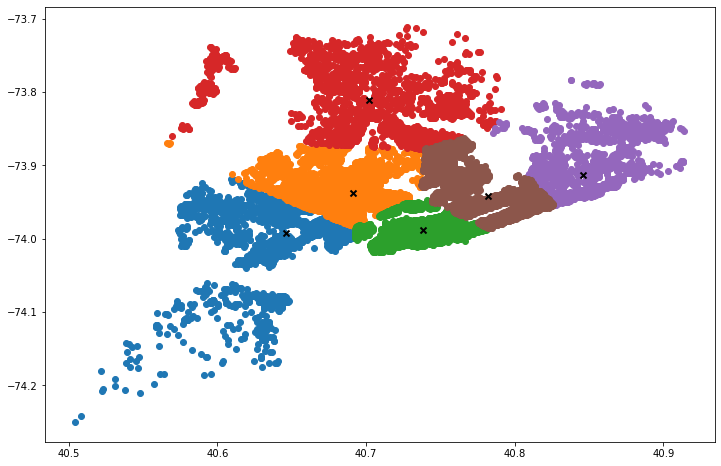

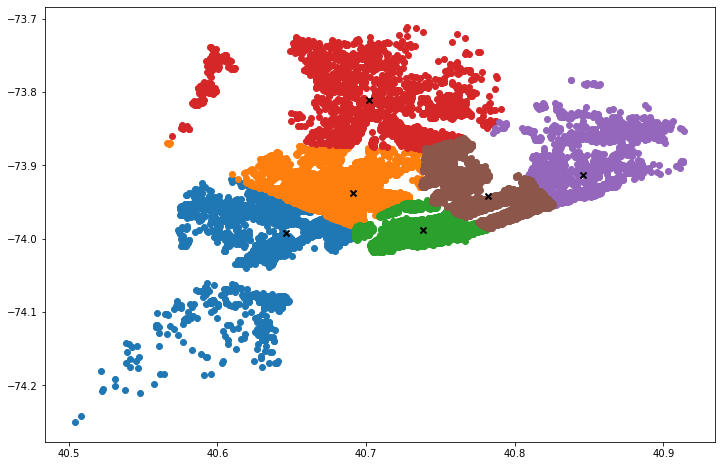

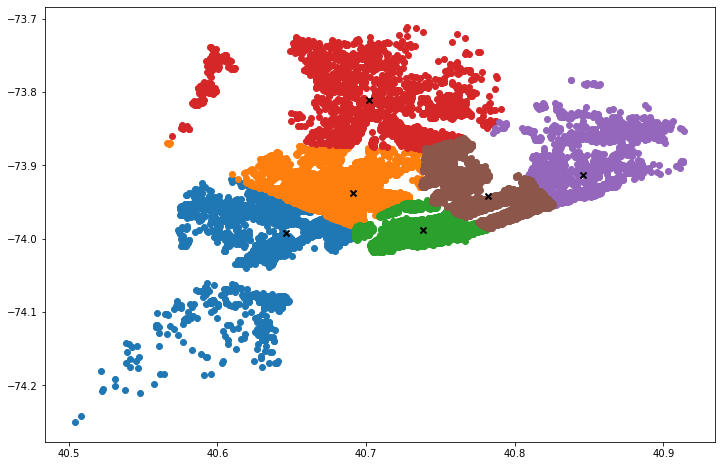

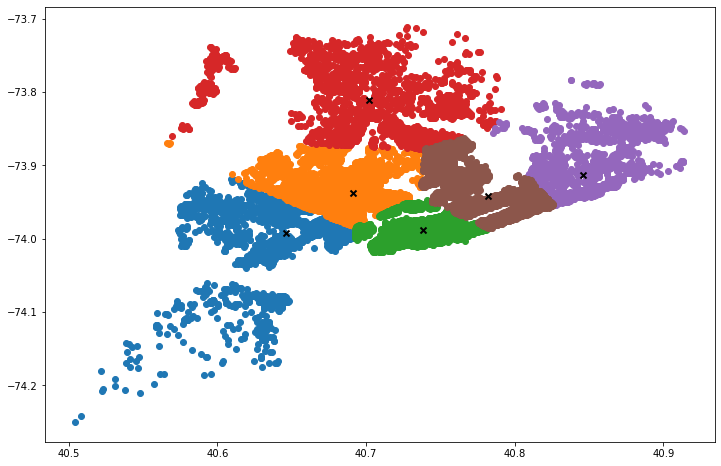

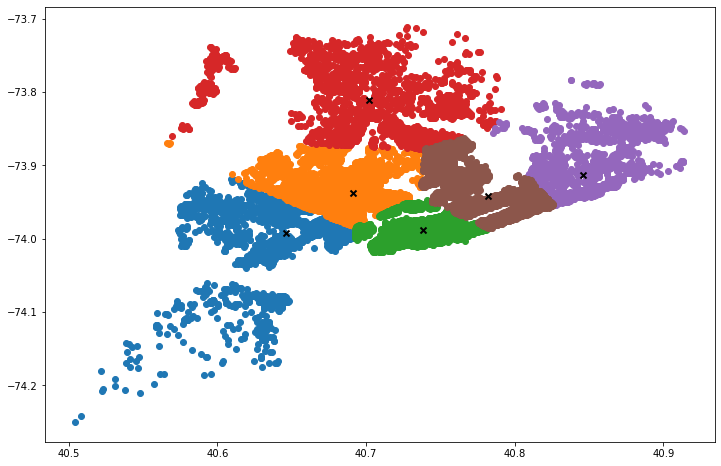

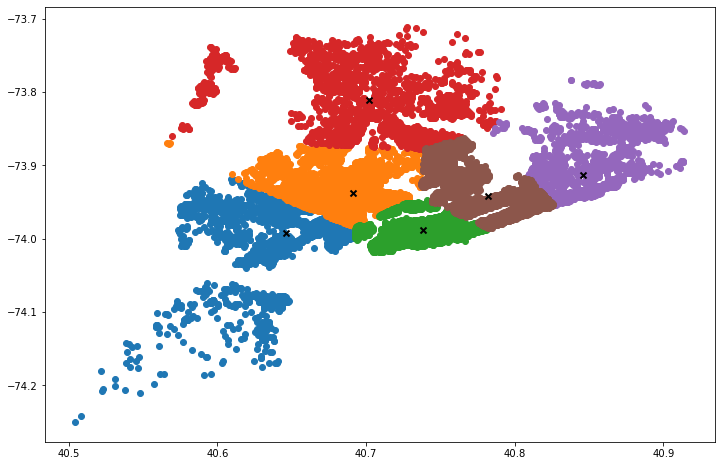

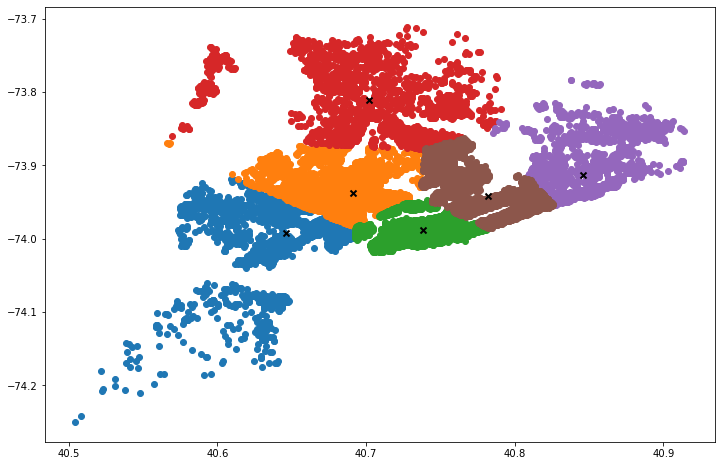

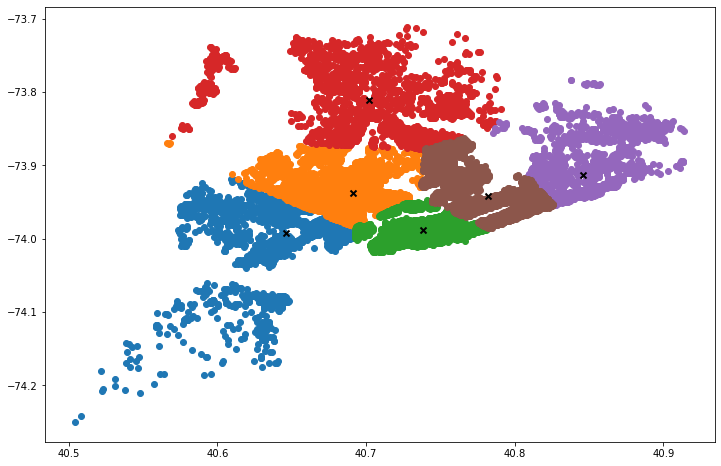

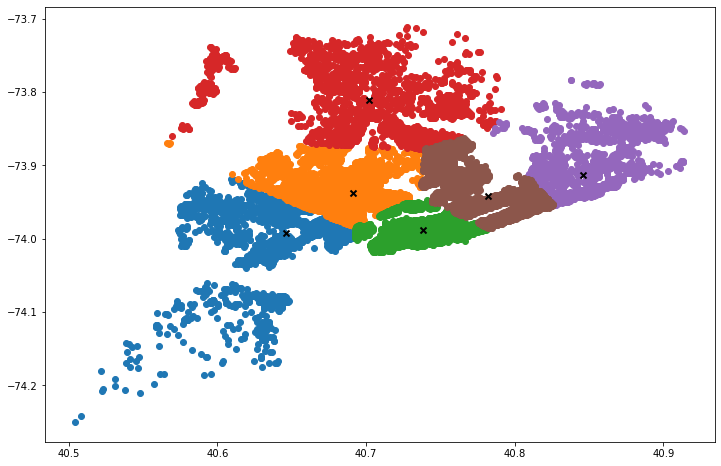

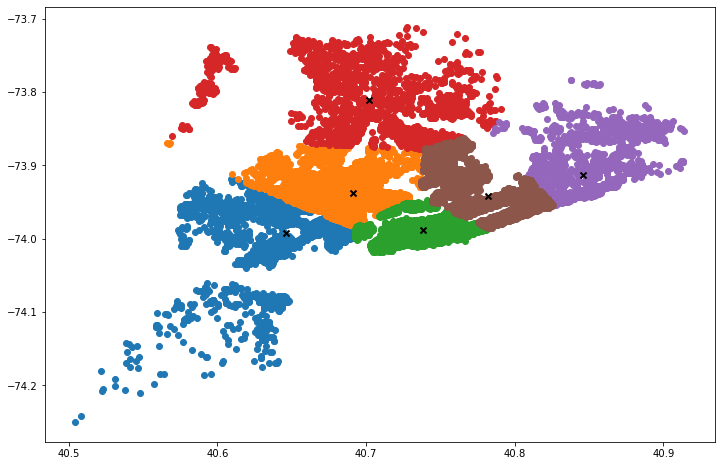

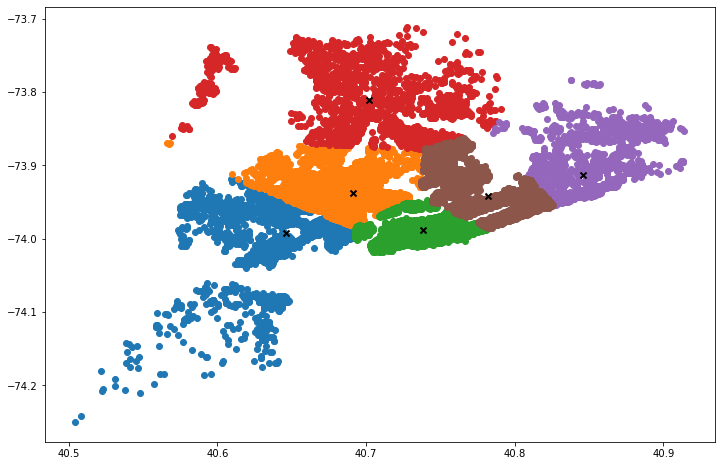

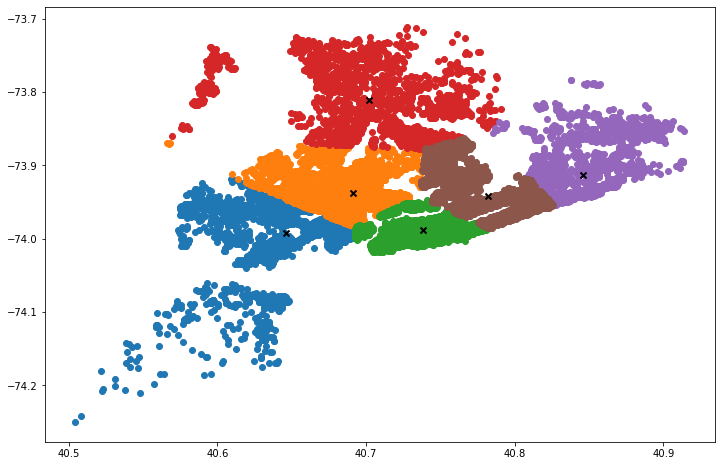

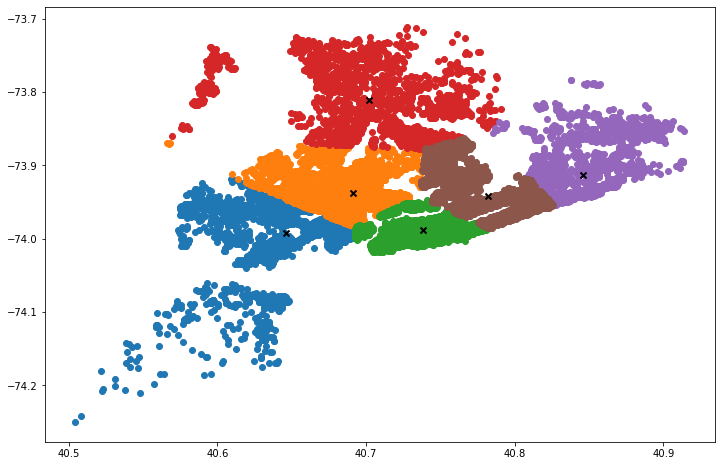

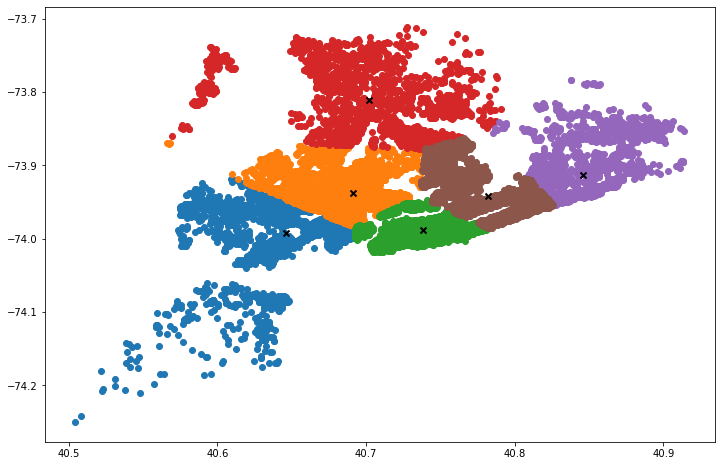

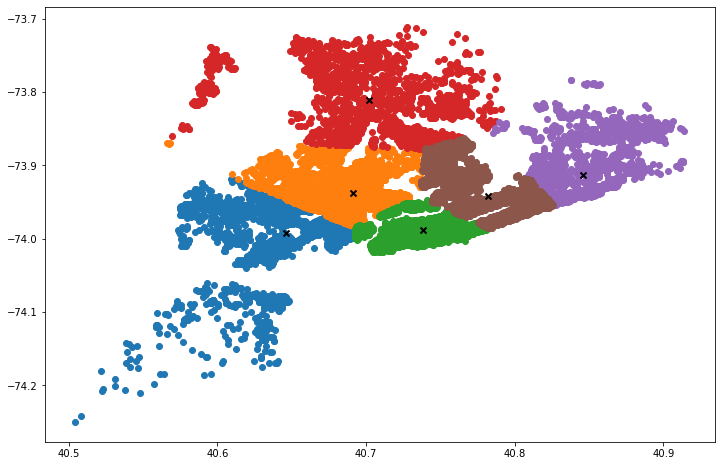

In [24]:
class KMeans:
    # Initial function to declare parameter and set the default value
    def __init__(self, K=6, max_iters=100, plot_steps=False, printcount=0):
        self.K = K                          # Number of clusters
        self.max_iters = max_iters          # Maximum iteration
        self.plot_steps = plot_steps        # For print plot for every iteration
        self.printcount = printcount        # Number of plot printed (to give the output .png plot number)   

        self.clusters = [[] for _ in range(self.K)]     # List of sample indices for each cluster
        self.centroids = []                             # The centers (mean feature vector) for each cluster

    # Predict function to initialize the clustering (used later to start the algorithm on specified data)
    def predict(self, X):
        self.X = X                                  # The dataset
        self.n_samples, self.n_features = X.shape   # Number of samples (rows, column)

        # Initialize random centroid
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # Iteration to optimizing the clusters
        for _ in range(self.max_iters):
            # Assign samples to closest centroids (create or update clusters)
            self.clusters = self._create_clusters(self.centroids)
            
            if self.plot_steps:
                self.plot()

            # Calculate new centroids from the clusters (create or update centroids)
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            # check if clusters have changed (if converged then stop the iteration)
            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()

        # Classify samples as the index of their clusters
        return self._get_cluster_labels(self.clusters)

    def _get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels

    def _create_clusters(self, centroids):
        # Assign the samples to the closest centroids to create clusters
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index

    def _get_centroids(self, clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        # distances between each old and new centroids, fol all centroids
        distances = [
            euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)
        ]
        return sum(distances) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))
        self.printcount = self.printcount + 1
        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)

        
        plt.savefig('Airbnb/Airbnb ({:d}).png'.format(self.printcount))
        plt.savefig('Airbnb/Trans/Airbnb ({:d}).png'.format(self.printcount), transparent=True)
        plt.show()
        


# Testing
if __name__ == "__main__":
    df = pd.read_csv('Airbnb_nyc.csv', usecols=[6,7], header=1)
    X = df.to_numpy()
    print(X.shape)
    print(X)


    clusters = 6 #len(np.unique(y))
    #print(clusters)

    k = KMeans(K=clusters, max_iters=300, plot_steps=True)
    y_pred = k.predict(X)

    k.plot()